# Load Data



## Set env variables

assumes that `SOCRATA_APP_TOKEN`, `SOCRATA_API_KEY_ID`, and `SOCRATA_API_KEY_SECRET` are set in `.env`

In [1]:
from dotenv import load_dotenv

load_dotenv()


True

## Load Packages

In [2]:
import os
import sys

PACKAGE_PATH = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, PACKAGE_PATH)

from src import config
from src import preprocessing
from src import plotting
from src import features



In [3]:
import pandas as pd
import numpy as np

import geopandas as gpd
from shapely.geometry import Point

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime, date

from importlib import reload

## Load Raw Data

In [4]:
df = preprocessing.load_dohmh_data()

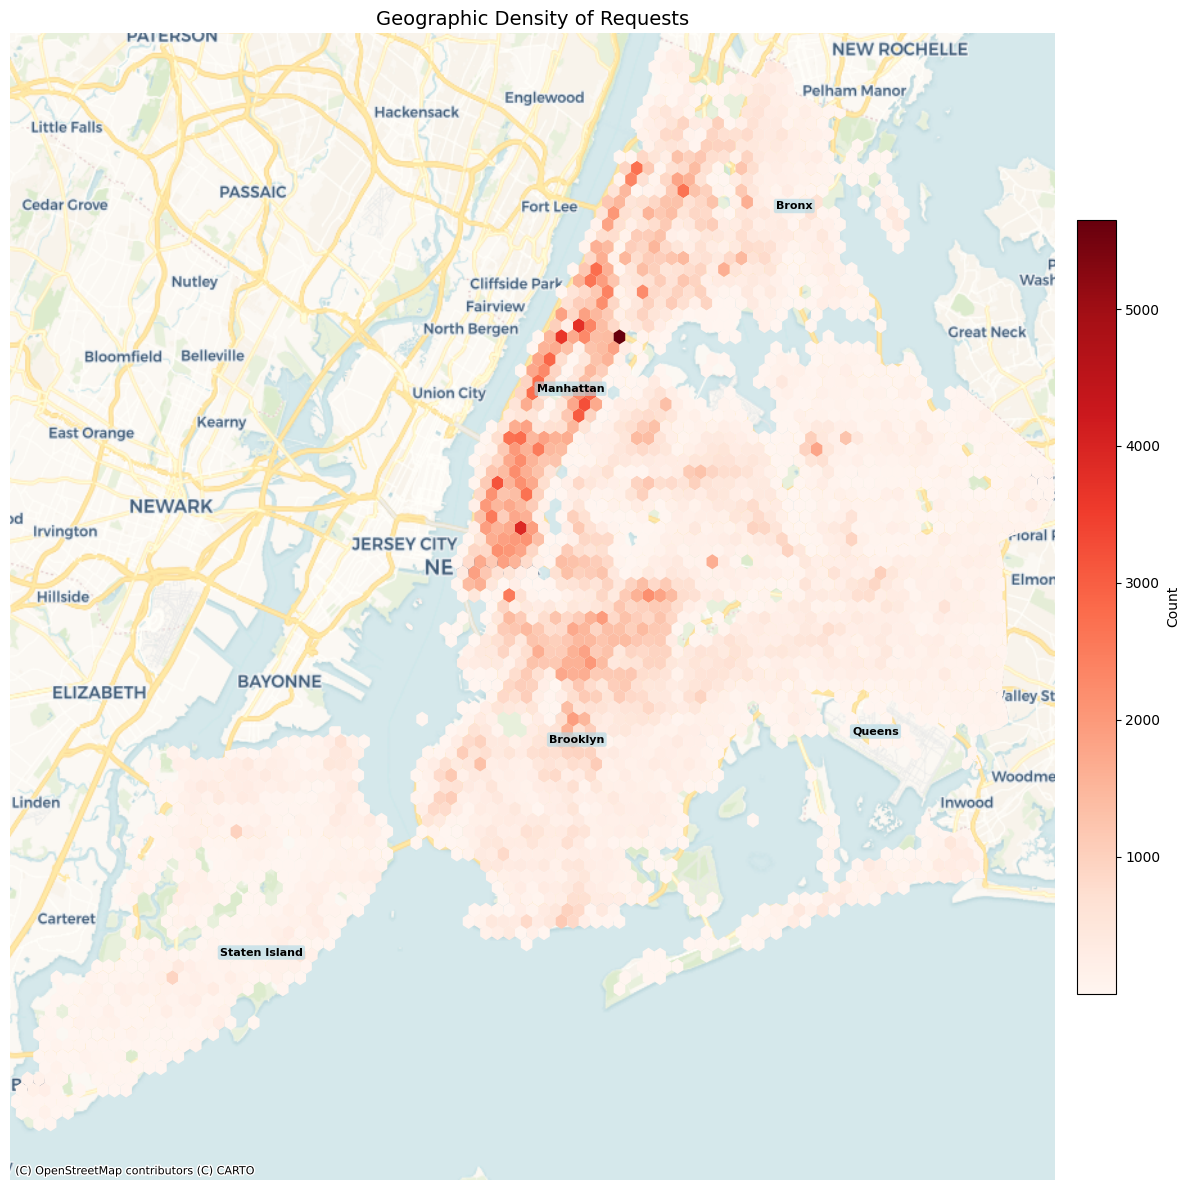

In [5]:
# Example usage with the existing data
fig, ax = plotting.create_hexbin_density_map(
    df, 
    lat_col='latitude', 
    lon_col='longitude',
    title="Geographic Density of Requests",
)
plt.show()


## Load Preprocessed Data

In [6]:
df = preprocessing.preprocess_and_merge_external_data()

Loading DOHMH data...
Data Shape: (1029875, 27)
Preprocessing DOHMH data...
Data Shape: (676138, 44)
Merging census data...
Data Shape: (676138, 48)
Merging weather data...
Data Shape: (662159, 59)

Final Data Shape: (662159, 59)


In [7]:
preprocessing.save_preprocessed_data(df)

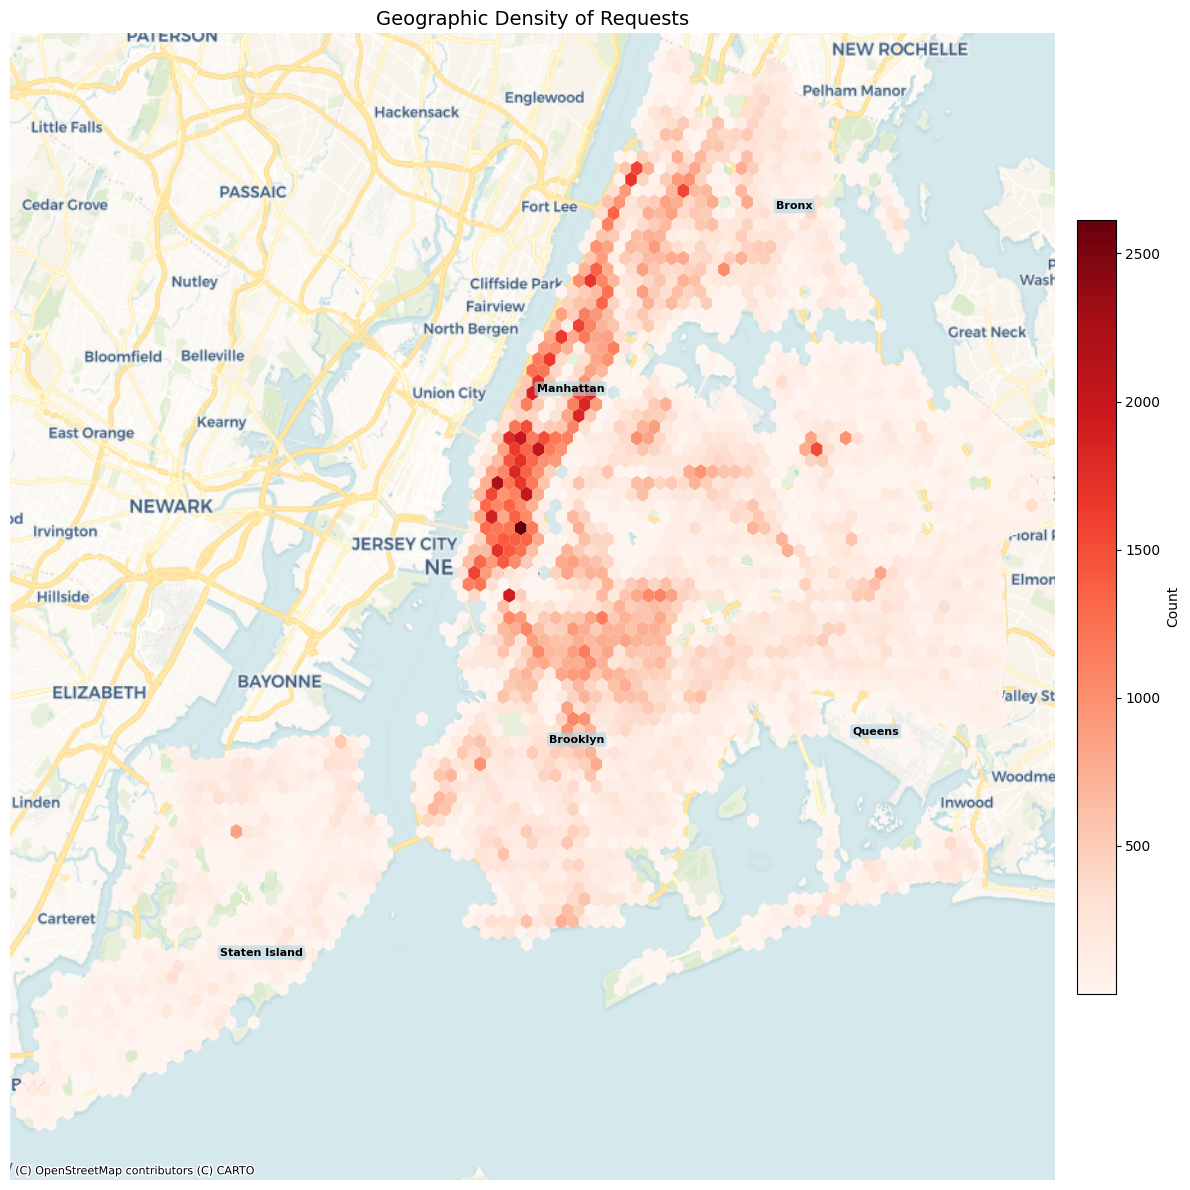

In [8]:
# Example usage with the existing data
fig, ax = plotting.create_hexbin_density_map(
    df, 
    lat_col='latitude', 
    lon_col='longitude',
    title="Geographic Density of Requests",
)
plt.show()


### Data Transformation

In [14]:
forecast_panel = features.build_forecast_panel(df)

c:\Users\gorav\GitHub\nyc-311-service-requests\src\features.py:125: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  panel = panel.groupby(["hex8", "complaint_family"], group_keys=False).apply(


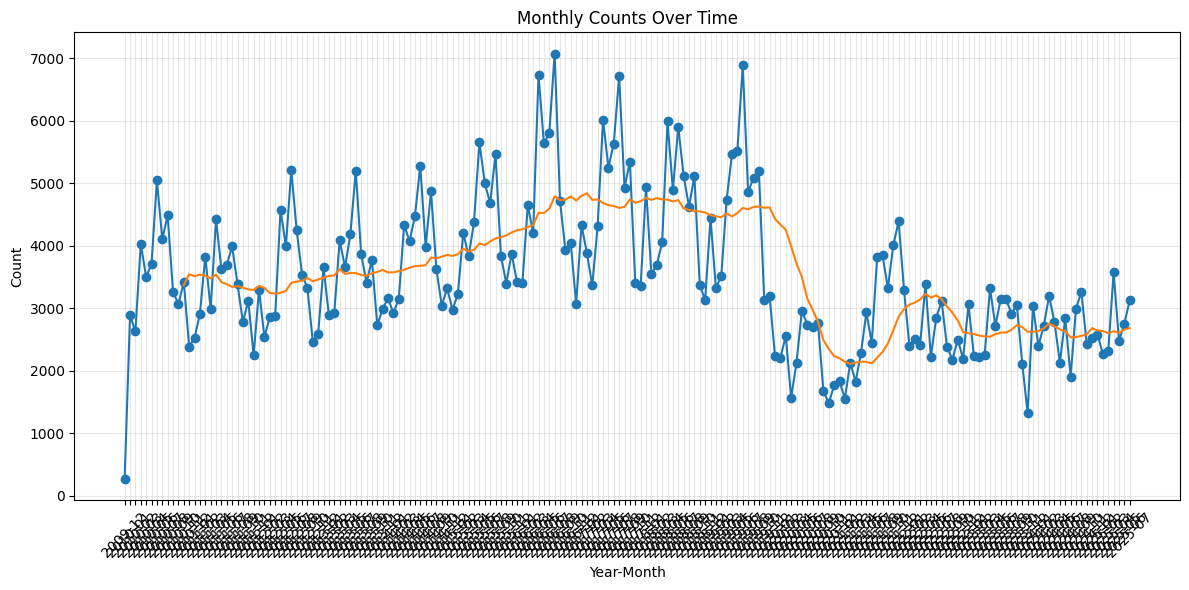

,year_month,y,y_smoothed
0,2009-12,274.0,NaN
1,2010-01,2886.0,NaN
2,2010-02,2629.0,NaN
3,2010-03,4029.0,NaN
4,2010-04,3497.0,NaN
...,...,...,...
183,2025-03,2308.0,2600.000000
184,2025-04,3571.0,2631.333333
185,2025-05,2477.0,2606.500000
186,2025-06,2753.0,2658.333333


In [10]:
# Plot counts over time by year-month
df_plot = forecast_panel.copy()
df_plot['year_month'] = df_plot['week'].dt.to_period('M')
monthly_counts = df_plot.groupby('year_month')['y'].sum().reset_index()
monthly_counts['y_smoothed'] = monthly_counts['y'].rolling(12).mean()
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts['year_month'].astype(str), monthly_counts['y'], marker='o')
plt.plot(monthly_counts['year_month'].astype(str), monthly_counts['y_smoothed'])

plt.title(f'Monthly Counts Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

monthly_counts

### Save File Out

In [ ]:
features.save_forecast_panel_data(forecast_panel)